In [1]:
!pip install mxnet==1.5

In [2]:
!pip install requests matplotlib opencv-python-headless

In [3]:
import mxnet as mx
path='http://data.mxnet.io/models/imagenet-11k/'
[mx.test_utils.download(path+'resnet-152/resnet-152-symbol.json'),
 mx.test_utils.download(path+'resnet-152/resnet-152-0000.params'),
 mx.test_utils.download(path+'synset.txt')]

['resnet-152-symbol.json', 'resnet-152-0000.params', 'synset.txt']

In [4]:
sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-152', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

[16:12:10] src/nnvm/legacy_json_util.cc:209: Loading symbol saved by previous version v0.8.0. Attempting to upgrade...
[16:12:10] src/nnvm/legacy_json_util.cc:217: Symbol successfully upgraded!


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

def get_image(url, show=False):
    # download and show the image
    fname = mx.test_utils.download(url)
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))

probability=0.249249, class=n02122948 kitten, kitty
probability=0.128923, class=n02121808 domestic cat, house cat, Felis domesticus, Felis catus
probability=0.068970, class=n02123394 Persian cat
probability=0.061574, class=n02122298 kitty, kitty-cat, puss, pussy, pussycat
probability=0.052336, class=n02121620 cat, true cat


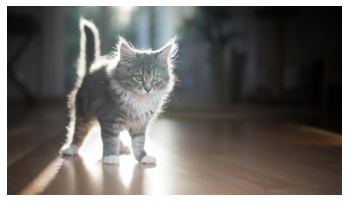

In [8]:
predict('https://i.cbc.ca/1.5256404.1566499707!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/cat-behaviour.jpg')

probability=0.162456, class=n03119396 coupe
probability=0.128077, class=n04166281 sedan, saloon
probability=0.114350, class=n02861886 body
probability=0.085967, class=n03791235 motor vehicle, automotive vehicle
probability=0.036055, class=n02918595 bumper


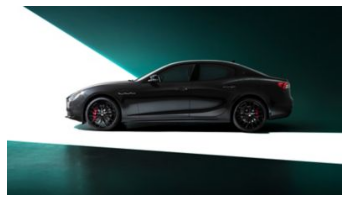

In [9]:
predict('https://s7g10.scene7.com/is/image/maserati/maserati/international/Models/my22/ghibli-my22/my22/16_9/GH_side.jpg')

probability=0.830327, class=n02439033 giraffe, camelopard, Giraffa camelopardalis
probability=0.026973, class=n08677424 veld, veldt
probability=0.023744, class=n02394477 even-toed ungulate, artiodactyl, artiodactyl mammal
probability=0.015358, class=n01862399 female mammal
probability=0.011232, class=n01324610 herbivore


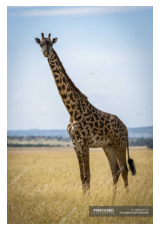

In [12]:
predict('https://st.focusedcollection.com/13735766/i/1800/focused_286922114-stock-photo-scenic-view-masai-giraffe-wild.jpg')

probability=0.288362, class=n03450516 gown, robe
probability=0.176469, class=n09874725 bride
probability=0.063902, class=n03450230 gown
probability=0.047641, class=n02898585 bridal gown, wedding gown, wedding dress
probability=0.045833, class=n04489695 trousseau


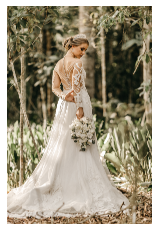

In [13]:
predict('https://images.unsplash.com/photo-1557363763-8381968f8353')

probability=0.192723, class=n09874725 bride
probability=0.114113, class=n04496614 tulle
probability=0.096719, class=n02898585 bridal gown, wedding gown, wedding dress
probability=0.065944, class=n03450516 gown, robe
probability=0.059063, class=n03502331 head covering, veil


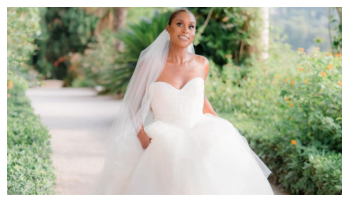

In [14]:
predict('https://wwd.com/wp-content/uploads/2021/07/issa-rae-wedding.jpg?crop=0px%2C249px%2C1080px%2C606px&resize=910%2C511')